In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import heejin
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import LogisticRegression,LinearRegression,LogisticRegressionCV,Ridge,Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
houseDF = pd.read_csv('../data/HousingData.csv')
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
houseDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
houseDF.corr()['MEDV'].abs().sort_values(ascending=False)  # LSTAT, RM, PTRATIO, INNDUS, TAX 등등

MEDV       1.000000
LSTAT      0.735822
RM         0.695360
PTRATIO    0.507787
INDUS      0.481772
TAX        0.468536
NOX        0.427321
AGE        0.394656
CRIM       0.391363
RAD        0.381626
ZN         0.373136
B          0.333461
DIS        0.249929
CHAS       0.181391
Name: MEDV, dtype: float64

In [ ]:
houseDF.isna().sum() # 결측치 존재 -> 박스플롯과 히스토그램 보고 무슨 값으로 대체하면 좋을지 판단 -> 삭제하는게 좋겠다.

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
houseDF.dropna(inplace=True)
houseDF.reset_index(drop=True, inplace=True)

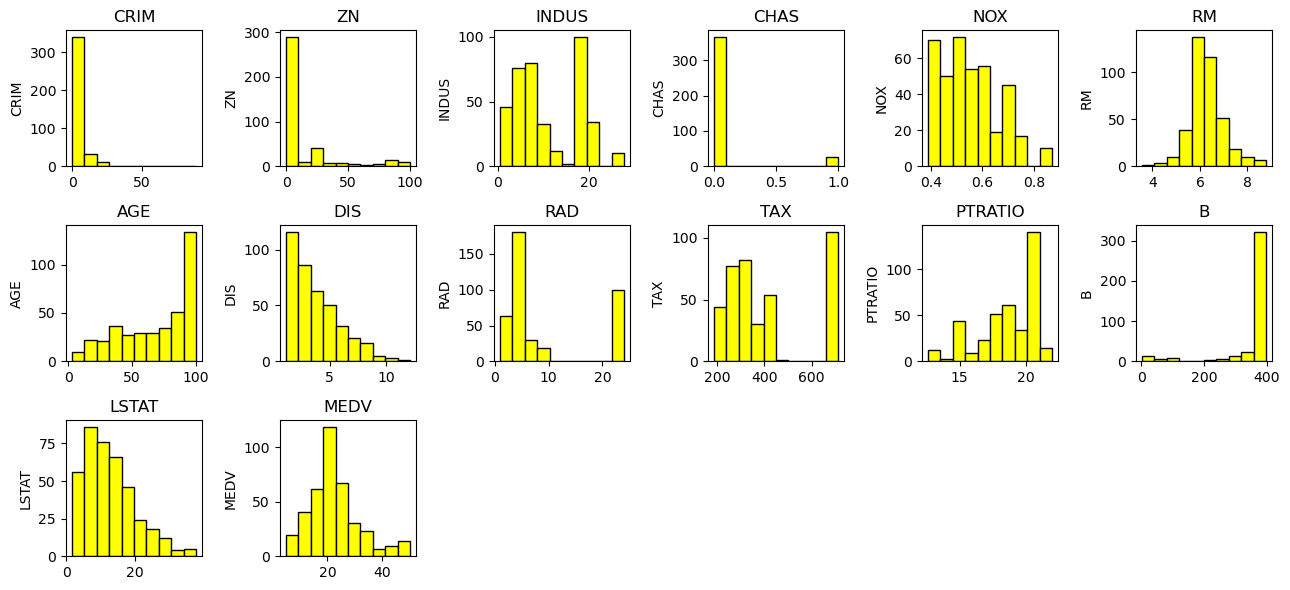

In [ ]:
plt.figure(figsize=(13,6))
heejin.print_hist(3,6,houseDF[:-1])

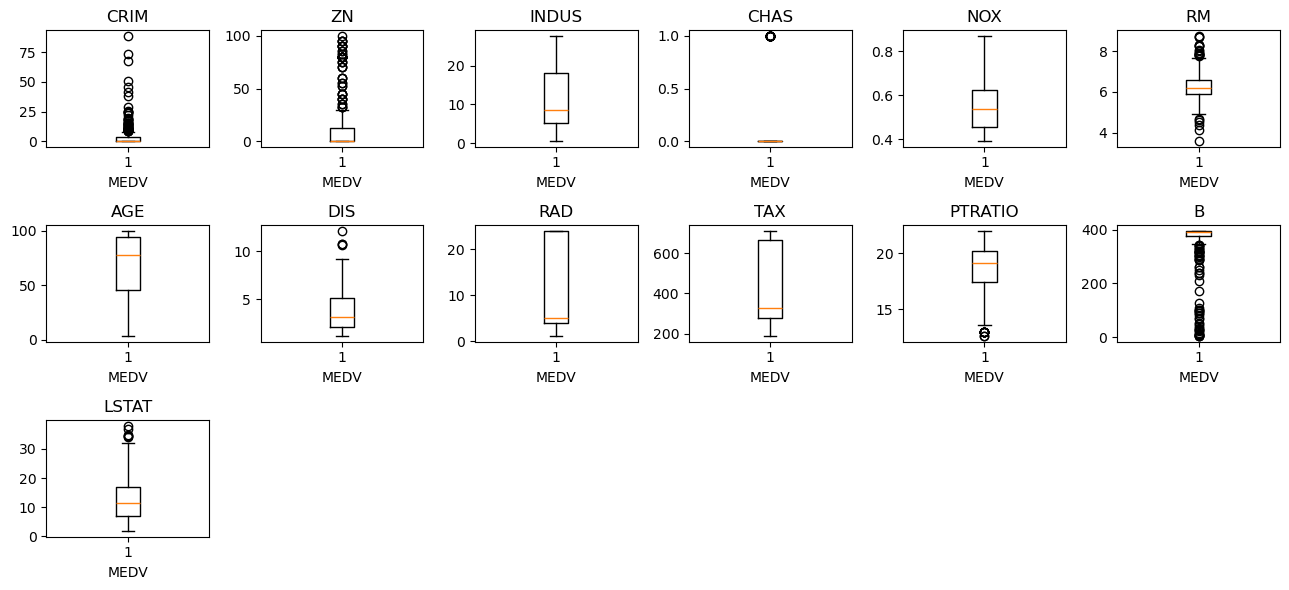

In [ ]:
plt.figure(figsize=(13,6))
heejin.print_box(3,6,houseDF['MEDV'],houseDF[houseDF.columns[:-1]])  #  TAX와 MEDV 범위가 너무 큼 -> 스케일링 필요

In [ ]:
# 이상치 - 이상치에 덜 민감한 minmax나 robust 스케일러 적용
heejin.find_outlier_z(houseDF,3)

z - CRIM의 이상치 개수 : 7
z - ZN의 이상치 개수 : 12
z - INDUS의 이상치 개수 : 0
z - CHAS의 이상치 개수 : 27
z - NOX의 이상치 개수 : 0
z - RM의 이상치 개수 : 5
z - AGE의 이상치 개수 : 0
z - DIS의 이상치 개수 : 4
z - RAD의 이상치 개수 : 0
z - TAX의 이상치 개수 : 0
z - PTRATIO의 이상치 개수 : 0
z - B의 이상치 개수 : 21
z - LSTAT의 이상치 개수 : 3
z - MEDV의 이상치 개수 : 12


In [ ]:
houseDF.corr()['MEDV'].abs().sort_values(ascending=False)
# LSTAT, RM, PTRATIO, INDUS, TAX

MEDV       1.000000
LSTAT      0.743450
RM         0.723951
PTRATIO    0.543809
INDUS      0.510829
TAX        0.508864
NOX        0.459054
RAD        0.416638
AGE        0.407470
ZN         0.406822
CRIM       0.397230
B          0.347256
DIS        0.279547
CHAS       0.173701
Name: MEDV, dtype: float64

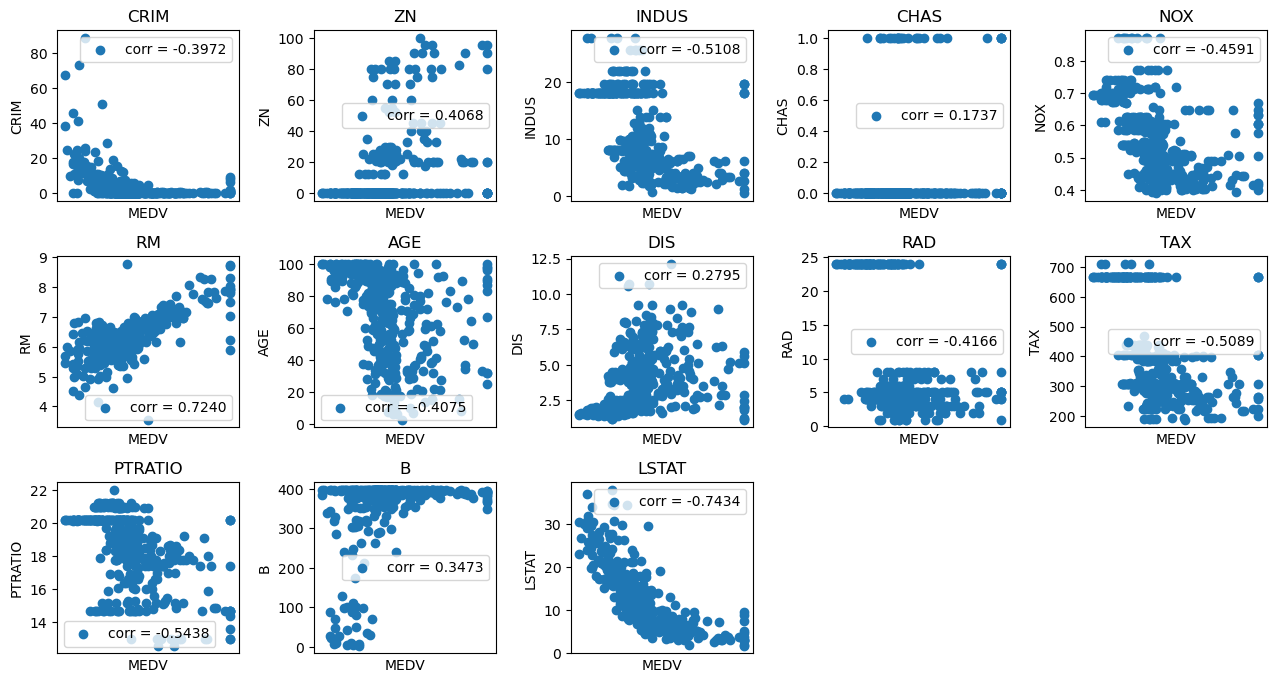

In [ ]:
plt.figure(figsize=(13,9))
heejin.print_scatter(4,5,houseDF['MEDV'],houseDF[houseDF.columns[:-1]])
# LSTAT, RM, PTRATIO, INDUS, TAX -> 약간 선형을 띰

In [ ]:
# LSTAT, RM, PTRATIO, INNDUS, TAX
# 인구의 하위상태, 주거지당 평균방수, 도시별 학생 대 교사 비율, 도시별 비소매업 면적의 비율, 세금
featureDF = houseDF[['LSTAT','RM','PTRATIO','INDUS','TAX']]
targetSR = houseDF[houseDF.columns[-1]]

In [ ]:
featureDF.reset_index(drop=True, inplace=True)
targetSR.reset_index(drop=True, inplace=True)

In [ ]:
max_random = heejin.find_random_state(featureDF,targetSR) # 21

radom_state = 21
score : 0.8304528133574096


21

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR, test_size=0.2, random_state=max_random)

In [ ]:
b_max, d_max = heejin.find_poly_p(xtrain,ytrain,xtest,ytest)

True 1 0.8304528133574096
True 2 0.9088798823729917
True 3 0.8958016145425448
True 4 0.8831994082791425
True 5 0.8838033063123216
False 1 0.8304528133574096
False 2 0.8901641275388709
False 3 0.8397603066546055
False 4 0.5792131186308755
False 5 -98.86517138931595
max score =>
interaction_only = True, degree = 2, score = 0.9088798823729917


In [ ]:
poly = PolynomialFeatures(interaction_only=b_max, degree=d_max)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)
xtrain_poly.shape, xtest_poly.shape

((315, 16), (79, 16))

In [ ]:
model_score = heejin.find_re_model(xtrain_poly,ytrain,xtest_poly,ytest,'r2')
# (Ridge(alpha=0.5), RobustScaler(), 0.9282636781837633)

----------------탐색중------------------
model : KNeighborsRegressor(n_neighbors=2)
scaler : StandardScaler()
Train score : 0.9197241623374958
Test score : 0.8195612434723156

    [모델 설명도]
R2 : 0.8195612434723156
[에러]
MAE : 2.551898734177215
MSE : 16.119746835443035
RMSE : 4.014940452291047
--------------------------------------
    
model : LinearRegression()
scaler : StandardScaler()
Train score : 0.8262464096370368
Test score : 0.9088798823729851

    [모델 설명도]
R2 : 0.9088798823729851
[에러]
MAE : 2.156411297148624
MSE : 8.14034221931645
RMSE : 2.8531284968112547
--------------------------------------
    
model : Ridge(alpha=0.5, max_iter=30000)
scaler : StandardScaler()
Train score : 0.8165306745827401
Test score : 0.9246928724391565

    [모델 설명도]
R2 : 0.9246928724391565
[에러]
MAE : 1.9964182584550814
MSE : 6.727666797010768
RMSE : 2.5937746234032684
--------------------------------------
    
model : Lasso(alpha=0.1, max_iter=30000)
scaler : StandardScaler()
Train score : 0.735529369101

In [ ]:
scoreDF = pd.DataFrame(model_score)
scoreDF

,model,scaler,train_score,test_score,r2,mae,mse,rmse
0,KNeighborsRegressor(n_neighbors=2),StandardScaler(),0.919724,0.819561,0.819561,2.551899,16.119747,4.014940
1,LinearRegression(),StandardScaler(),0.826246,0.908880,0.908880,2.156411,8.140342,2.853128
2,"Ridge(alpha=0.5, max_iter=30000)",StandardScaler(),0.816531,0.924693,0.924693,1.996418,6.727667,2.593775
3,"Lasso(alpha=0.1, max_iter=30000)",StandardScaler(),0.735529,0.883668,0.883668,2.428347,10.392710,3.223773
4,KNeighborsRegressor(n_neighbors=2),MinMaxScaler(),0.918429,0.814780,0.814780,2.598101,16.546867,4.067784
5,LinearRegression(),MinMaxScaler(),0.826246,0.908880,0.908880,2.156411,8.140342,2.853128
6,"Ridge(alpha=0.5, max_iter=30000)",MinMaxScaler(),0.733107,0.872193,0.872193,2.474714,11.417837,3.379029
7,"Lasso(alpha=0.1, max_iter=30000)",MinMaxScaler(),0.695550,0.828224,0.828224,2.866800,15.345829,3.917375
8,KNeighborsRegressor(n_neighbors=2),RobustScaler(),0.917358,0.812974,0.812974,2.624684,16.708259,4.087574
9,LinearRegression(),RobustScaler(),0.826246,0.908880,0.908880,2.156411,8.140342,2.853128


In [ ]:
scaler = RobustScaler()

scaled_xtrain = scaler.fit_transform(xtrain_poly)
scaled_xtest = scaler.transform(xtest_poly)

In [ ]:
model = Ridge(alpha = 0.5, max_iter = 30000)

model.fit(scaled_xtrain, ytrain)
model.score(scaled_xtrain,ytrain), model.score(scaled_xtest,ytest)  # 테스트용 데이터에 과대적합..

(0.8072172422426542, 0.9282636781837633)

In [ ]:
pram = {'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        ,'fit_intercept':[True,False]}

ricv = GridSearchCV(model, param_grid=pram,return_train_score=True)
ricv.fit(scaled_xtrain,ytrain)

GridSearchCV(estimator=Ridge(alpha=0.5, max_iter=30000),
             param_grid={'fit_intercept': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             return_train_score=True)

In [ ]:
best_model = ricv.best_estimator_
best_model

Ridge(alpha=0.5, max_iter=30000, solver='sparse_cg')

In [ ]:
# 학습/검증에 대한 평가 모든 결과에 대한 처리
result = cross_validate(best_model,
                        scaled_xtrain,
                        ytrain,
                        return_train_score=True,
                        return_estimator=True,
                        scoring=('r2', 'neg_mean_squared_error'))  # score만 보고 싶으면 cross_val_score 사용

In [ ]:
resultDF = pd.DataFrame(result)
resultDF

,fit_time,score_time,estimator,test_r2,train_r2,test_neg_mean_squared_error,train_neg_mean_squared_error
0,0.003087,0.002167,"Ridge(alpha=0.5, max_iter=30000, solver='spars...",0.864631,0.784498,-12.424944,-17.106423
1,0.002157,0.002000,"Ridge(alpha=0.5, max_iter=30000, solver='spars...",0.727875,0.817766,-29.310688,-13.624195
2,0.003166,0.001208,"Ridge(alpha=0.5, max_iter=30000, solver='spars...",0.694899,0.819049,-16.506485,-16.038027
3,0.002547,0.000998,"Ridge(alpha=0.5, max_iter=30000, solver='spars...",0.765629,0.811387,-21.429024,-14.827988
4,0.002055,0.001050,"Ridge(alpha=0.5, max_iter=30000, solver='spars...",0.781634,0.800401,-11.862875,-17.434580


In [ ]:
best_model.fit(scaled_xtrain,ytrain)
best_model.score(scaled_xtrain,ytrain), best_model.score(scaled_xtest,ytest) # 테스트용 데이터셋에 과대적합

(0.807193835453551, 0.9282179609503686)

In [ ]:
# 회귀 모델 성능 평가 지표
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pre = model.predict(scaled_xtest)
r2 = r2_score(ytest, y_pre)
mse = mean_squared_error(ytest, y_pre)
mae = mean_absolute_error(ytest, y_pre)
rmse = mean_squared_error(ytest, y_pre, squared=False)
print(f'''
[모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {mae}\nMSE : {mse}\nRMSE : {rmse}
''')


[모델 설명도]
R2 : 0.9282636781837633
[에러]
MAE : 1.9329684101610662
MSE : 6.408663908112139
RMSE : 2.531533904199614


In [ ]:
# 예측
newdata = xtest_poly[0,:].reshape(-1,1).T

best_model.predict(newdata)  # 44888.8 달러? 일거라고 예측 - 예측값 이상함

array([44888.80353807])